# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : SARS-Cov-2 exam result
- **lignes et colonnes** : 5644, 111
- **types de variables** : qualitatives : 70, quantitatives : 41
- **Analyse des valeurs manquantes** :
    - beaucoup de NaN (moitié des variables > 90% de NaN)
    - 2 groupes de données 76% -> Test viral, 89% -> taux sanguins

#### Analyse de Fond :
- **Visualisation de la target** :
    - 10% de positifs (558 / 5000)
    
    
    
- **Signification des variables** :
    -  variables continues standardisées, skewed (asymétriques), test sanguin
    - age quantile : difficile d'interpreter ce graphique, clairement ces données ont été traitées, on pourrait penser 0-5, mais cela pourrait aussi etre une transformation mathématique. On peut pas savoir car la personne qui a mit ce dataset ne le précise nul part. Mais ca n'est pas tres important
    - variable qualitative : binaire (0, 1), viral, Rhinovirus qui semble tres élevée



- **Relation Variables / Target** :
    - target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothese a tester
    - target/age : les individus de faible age sont tres peu contaminés ? -> attention on ne connait pas l'age, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra etre intéressante pour la comparer avec les résultats de tests sanguins
    - target / viral : les doubles maladies sont tres rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothese a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut tres bien avoir 2 virus en meme temps. Tout ca n'a aucun lien avec le covid-19
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - blood_data / blood_data : certaines variables sont tres corrélées : +0.9 (a suveiller plus tard)
    - blood_data / age : tres faible corrélation entre age et taux sanguins
    - viral / viral : influenza rapid test donne de mauvais résultats, il fauda peut-etre la laisser tomber
    - relation maladie / blood data : Les taux sanguins entre malades et covid-19 sont différents
    - relation hospitalisation / est malade : 
    - relation hospitalisation / blood : intéressant dans le cas ou on voudrait prédire dans quelle service un patient devrait aller


- **NaN analyse** : viral : 1350(92/8), blood : 600(87/13), both : 90

### hypotheses nulle (H0): 

- Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents
    - H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs

- Les individus atteints d'une quelconque maladie ont des taux significativement différents


    

In [2]:
import warnings
warnings.filterwarnings("ignore")

Imports


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 111)
pd.set_option('display.max_columns', 111)


Read Data

In [4]:
data=pd.read_excel("dataset.xlsx")
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

Data types


In [5]:
data.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

Data shape


In [6]:
data.shape

(5644, 111)

Missing values percentage

Patient ID                                                 0.000000
Patient age quantile                                       0.000000
SARS-Cov-2 exam result                                     0.000000
Patient addmited to regular ward (1=yes, 0=no)             0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.000000
Patient addmited to intensive care unit (1=yes, 0=no)      0.000000
Influenza B                                               76.009922
Respiratory Syncytial Virus                               76.009922
Influenza A                                               76.009922
Rhinovirus/Enterovirus                                    76.045358
Inf A H1N1 2009                                           76.045358
CoronavirusOC43                                           76.045358
Coronavirus229E                                           76.045358
Parainfluenza 4                                           76.045358
Adenovirus                                      

<Axes: >

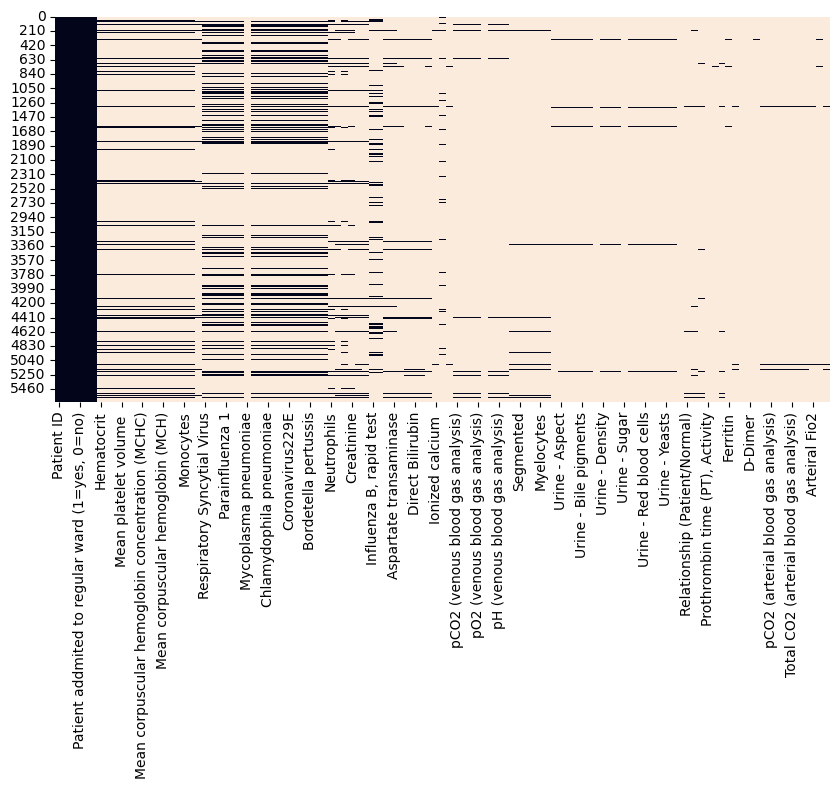

In [7]:
missing=data.isna().sum()/data.shape[0]*100
print(missing.sort_values(ascending=True))
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(),cbar=False)


Removing NAN values

(5644, 38)


<Axes: >

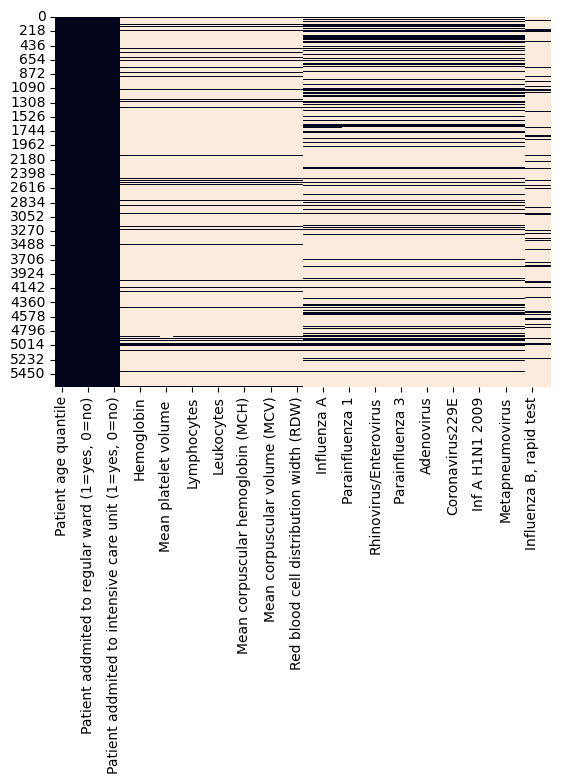

In [8]:

data=data[data.columns[data.isna().sum()/data.shape[0]<0.9]]
data.drop("Patient ID",axis=1,inplace=True)
print(data.shape)

sns.heatmap(data.isna(),cbar=False)



Visualisation de Target

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


(array([5086.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         558.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

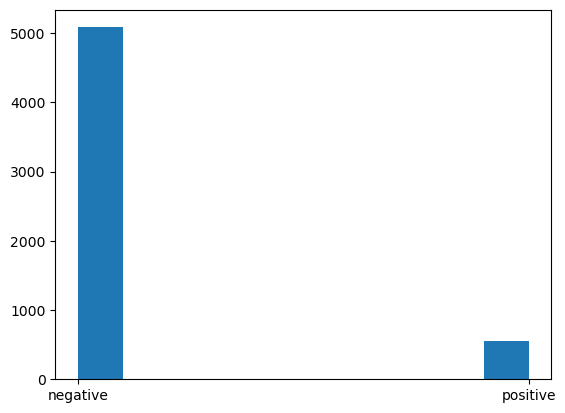

In [9]:
y=data["SARS-Cov-2 exam result"]
print(y.value_counts())
plt.hist(y)

Visualisation des variables continues


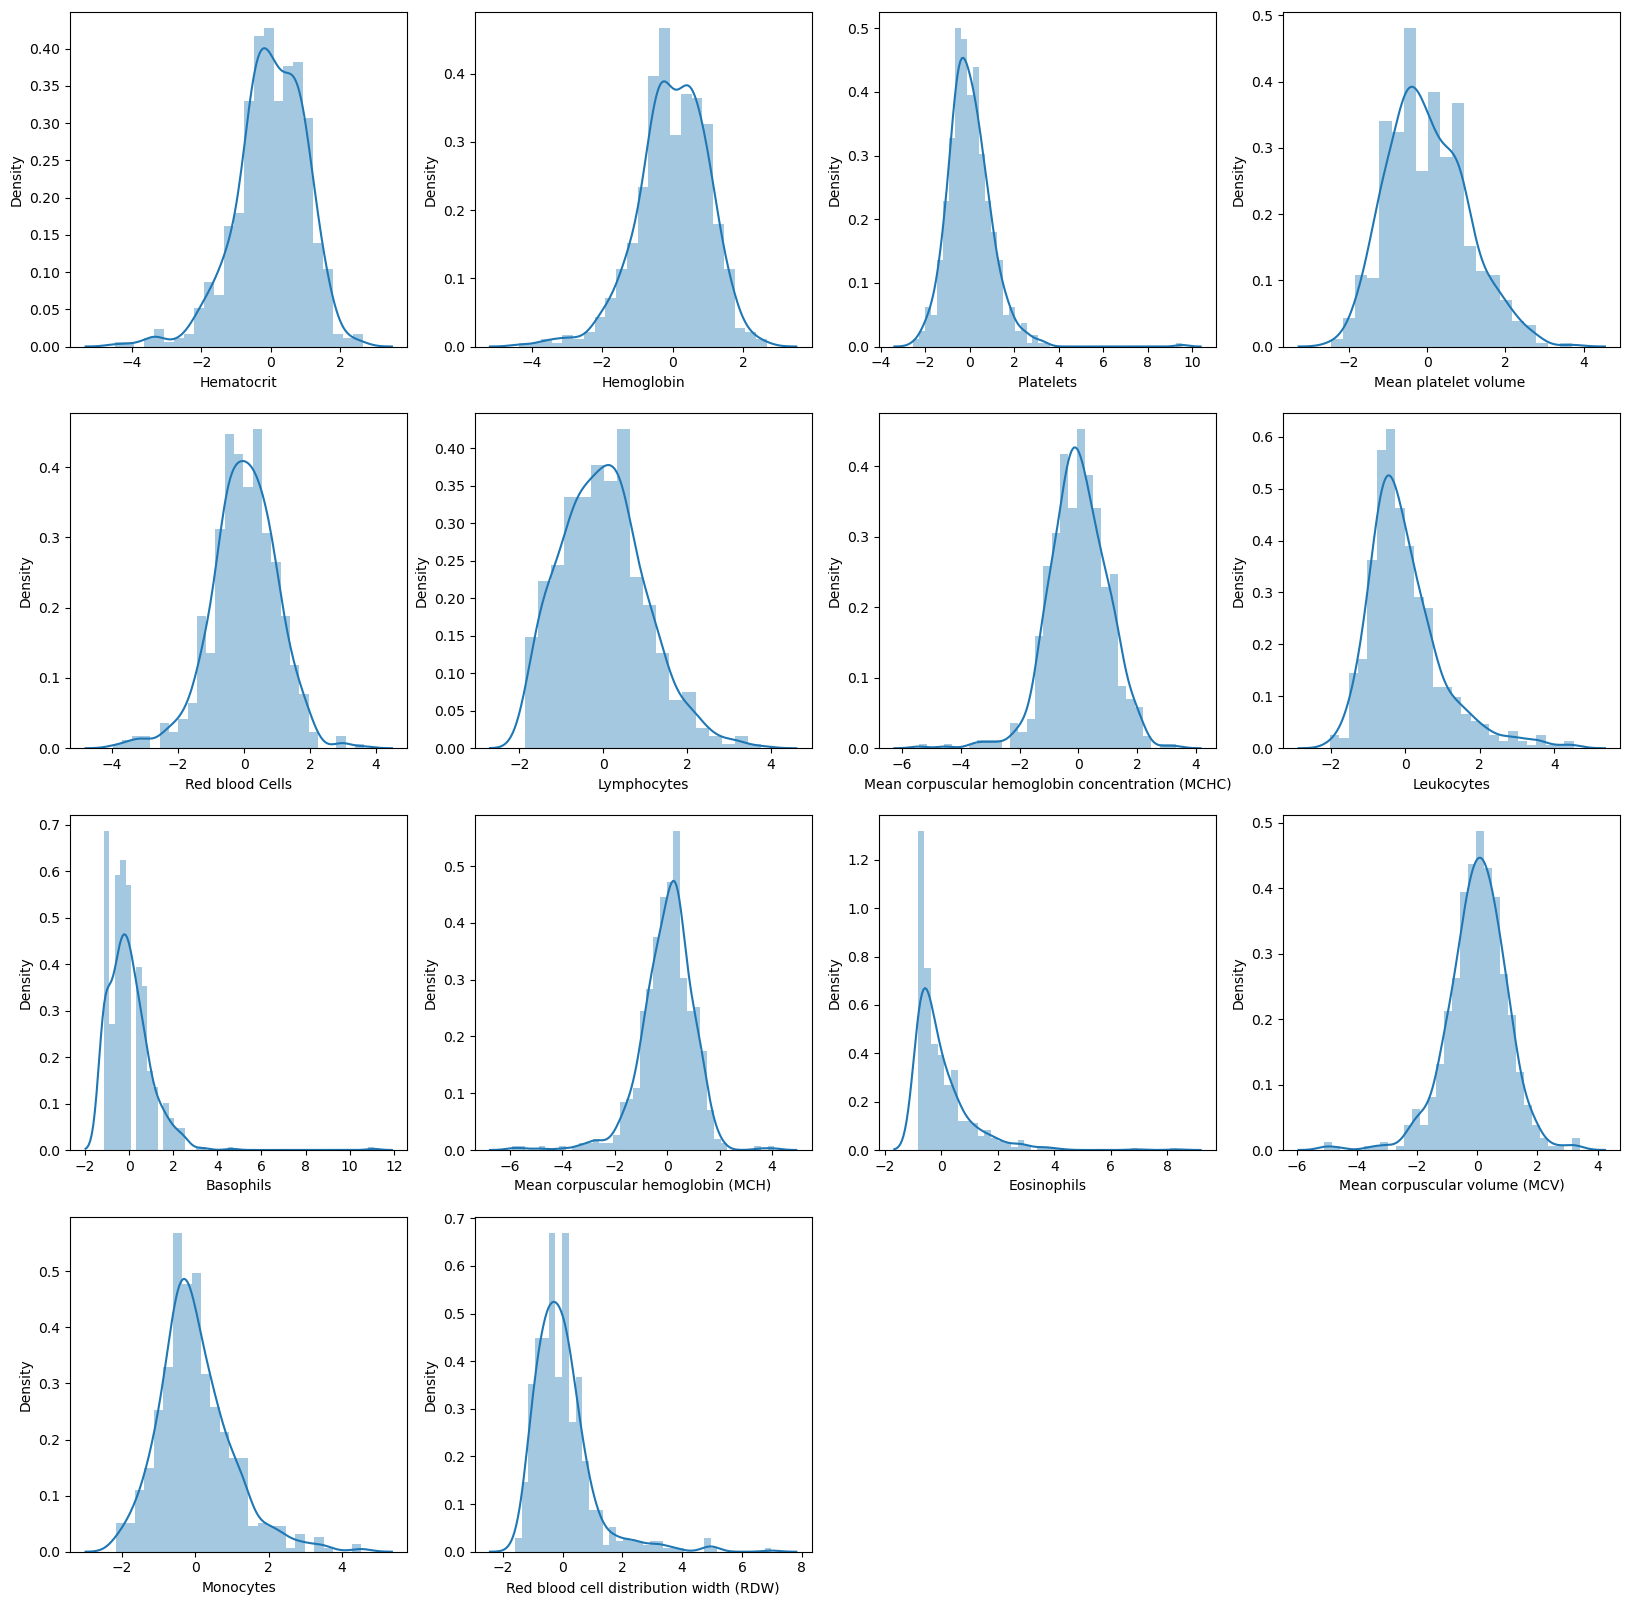

In [10]:
plt.figure(figsize=(20,20))
l=len(data.select_dtypes("float").columns)

for i,col in enumerate(data.select_dtypes("float")):
    plt.subplot(4,4,i+1)
    sns.distplot(data[col])



max       19.000000
min        0.000000
mean       9.318391
median     9.000000
std        5.777903
Name: Patient age quantile, dtype: float64


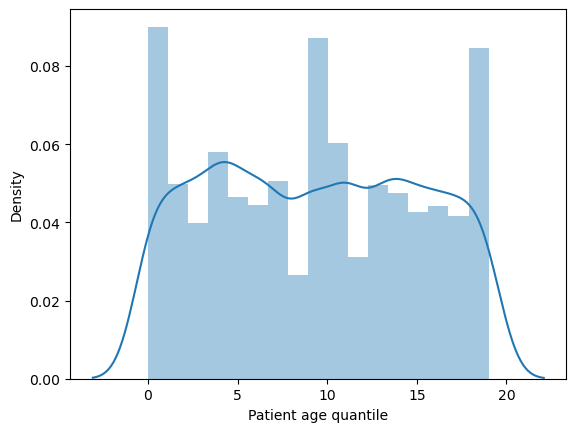

In [11]:
sns.distplot(data["Patient age quantile"])
print(data["Patient age quantile"].agg(["max","min","mean","median","std"]))

Variables Qualitatives

In [12]:
for col in data.select_dtypes("object"):
    print(f'{col:-<50}{data[col].unique()}')

SARS-Cov-2 exam result----------------------------['negative' 'positive']
Respiratory Syncytial Virus-----------------------[nan 'not_detected' 'detected']
Influenza A---------------------------------------[nan 'not_detected' 'detected']
Influenza B---------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------[nan 'not_detected' 'detected']
Adenovirus----------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------[nan 'not_detected' 'detected']
Coronavirus229E---------

In [13]:
data.drop("Parainfluenza 2",axis=1,inplace=True)

19


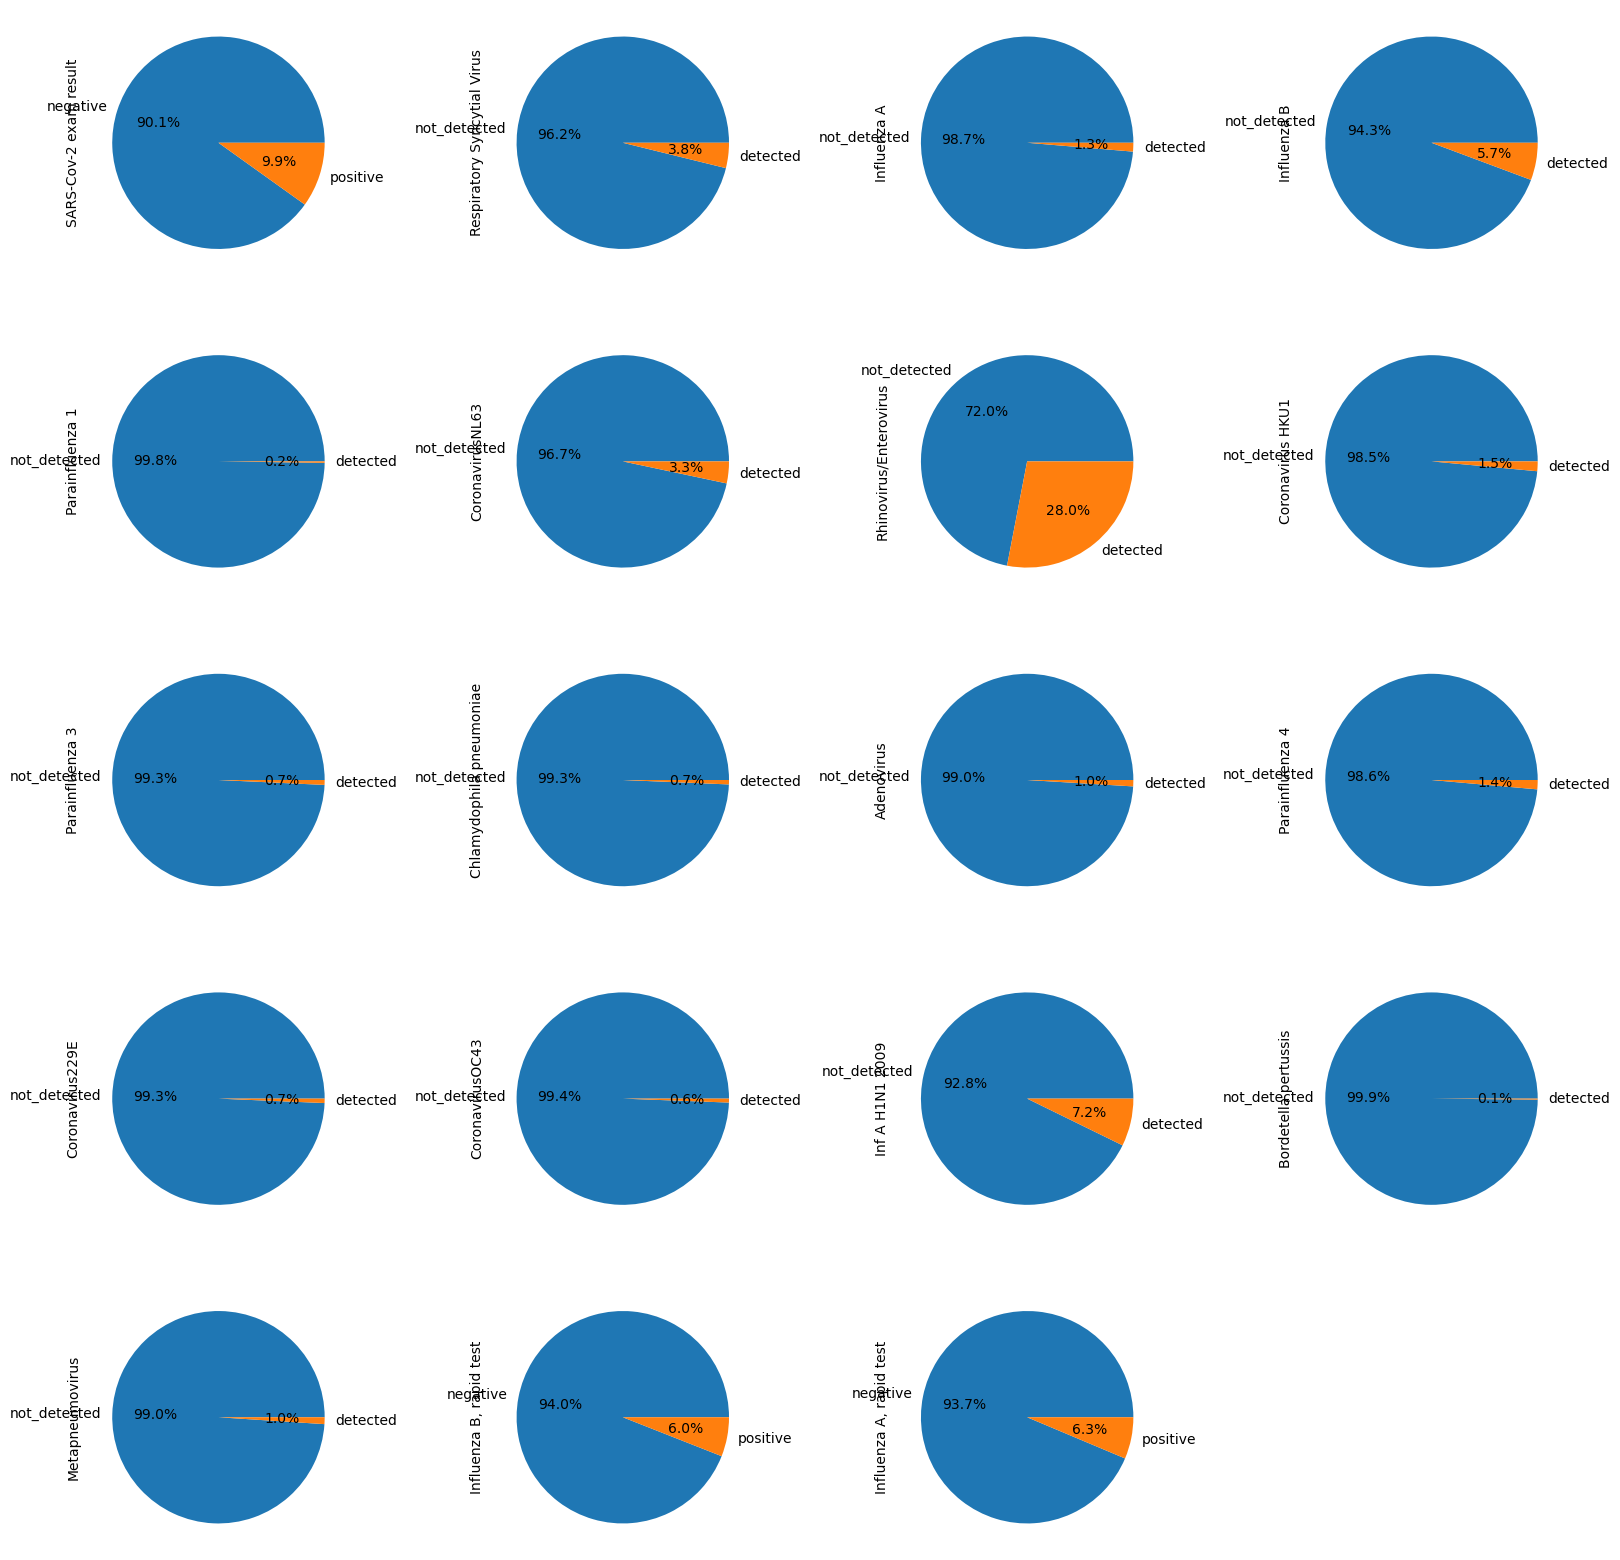

In [14]:
plt.figure(figsize=(20,20))
l=len(data.select_dtypes("object").columns)
print(l)

for i,col in enumerate(data.select_dtypes("object")):
    plt.subplot(5,4,i+1)
    data[col].value_counts().plot(kind="pie",textprops={"fontsize":10},autopct="%1.1f%%")


### Relation Target/Variables

In [15]:
positive=data[data["SARS-Cov-2 exam result"]=="positive"]
negative=data[data["SARS-Cov-2 exam result"]=="negative"]


Création des ensembles Blood et Viral

In [16]:
missing=data.isna().sum()/data.shape[0]
blood_columns=data[data.columns[(missing<0.9) & (missing>0.88)]]
viral_columns=data[data.columns[(missing<0.88) & (missing>0.75)]]
print(blood_columns.shape)
print(viral_columns.shape)

(5644, 14)
(5644, 18)


### Target / Blood

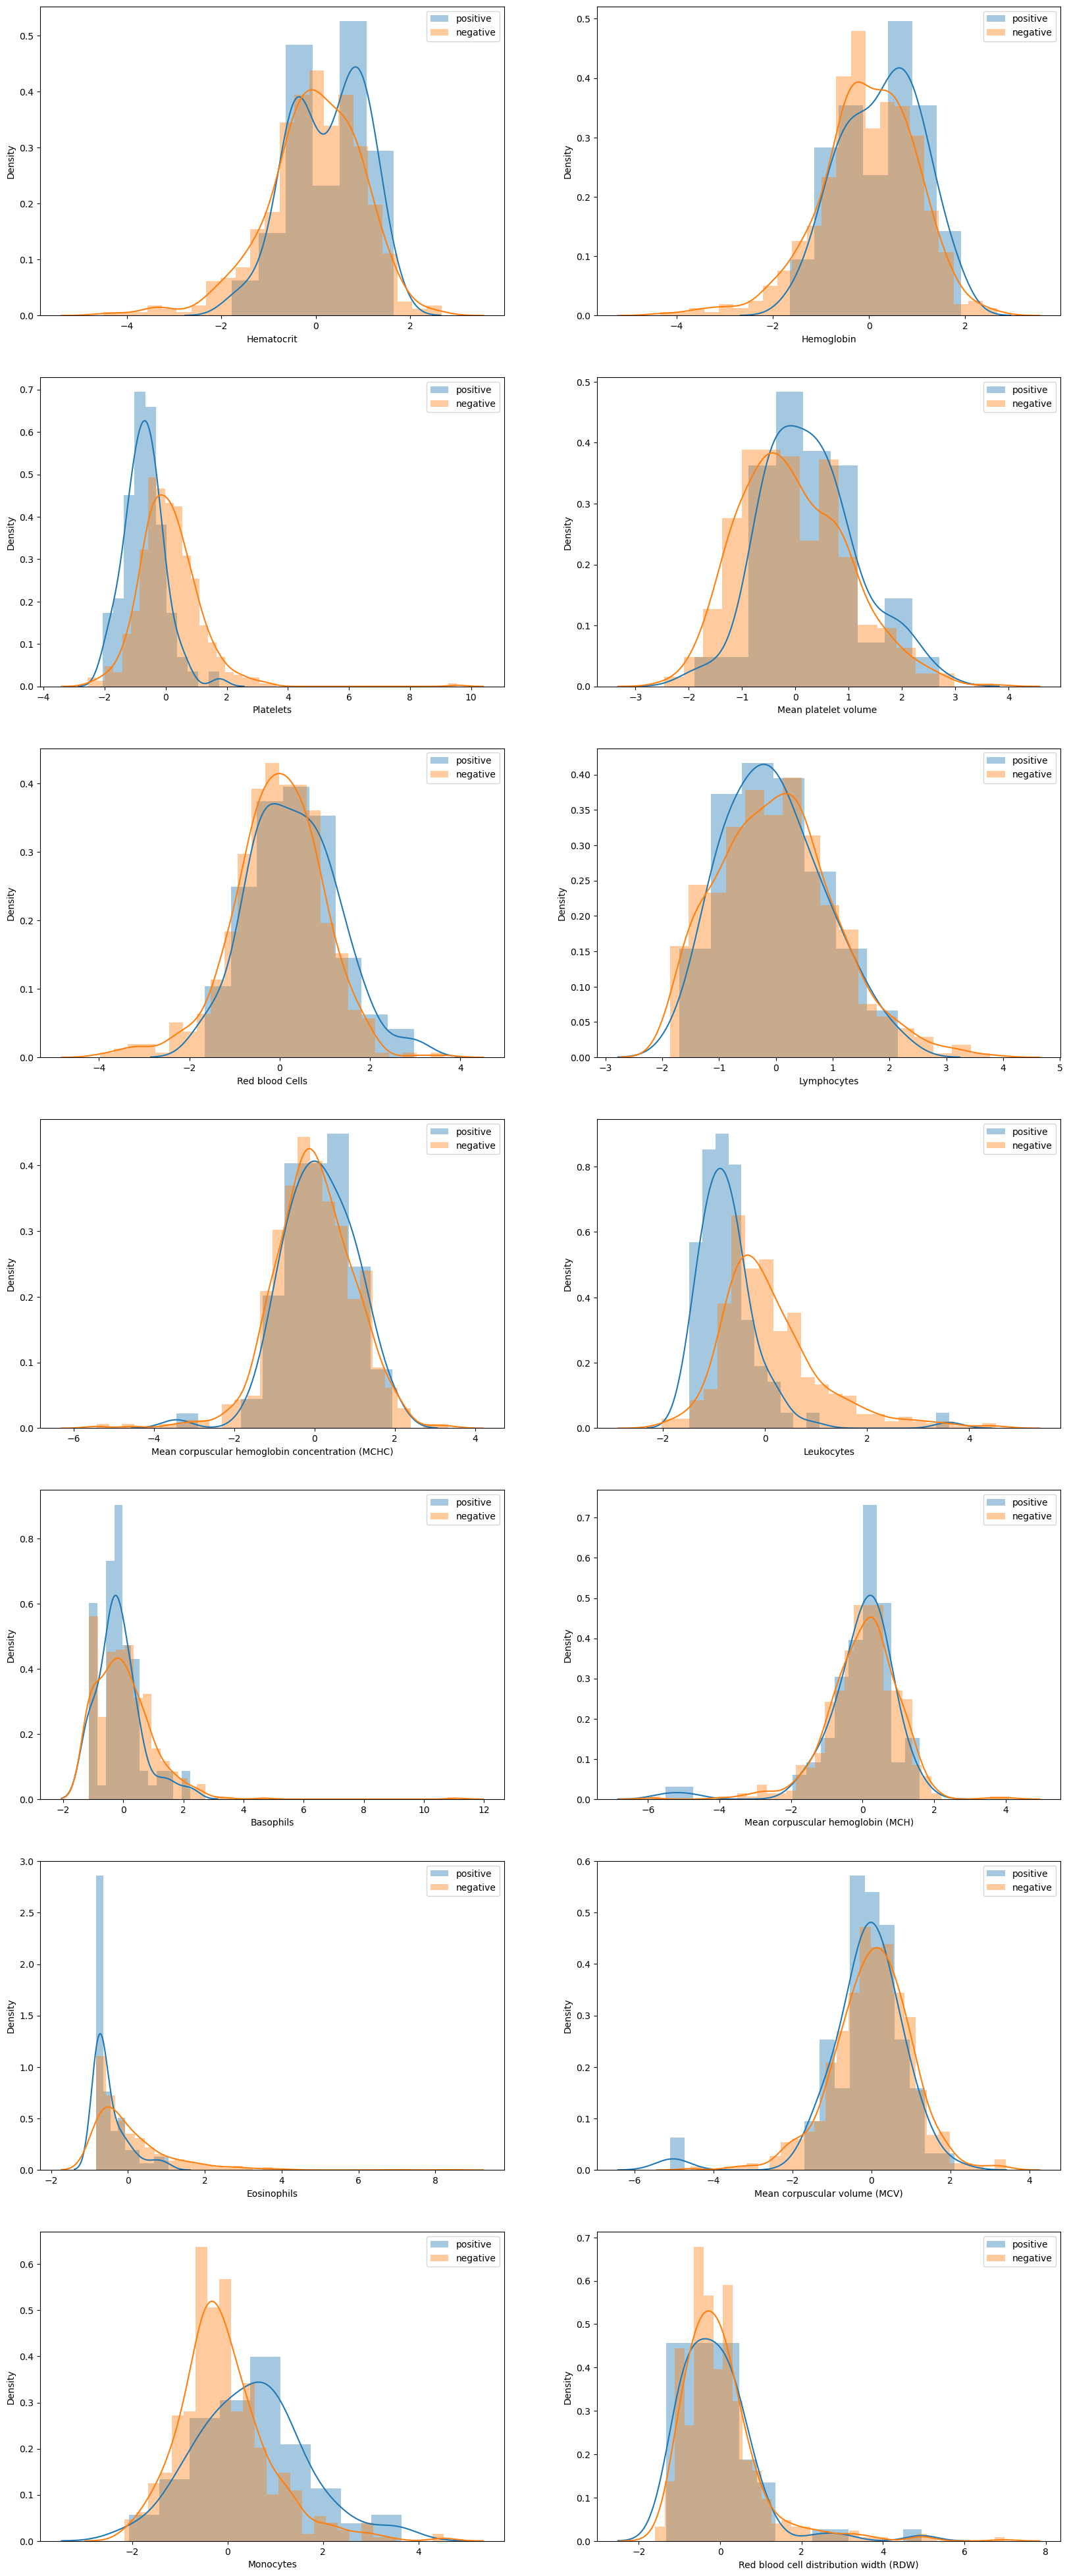

In [17]:
plt.figure(figsize=(20,50))
for i,col in enumerate(blood_columns.columns):
    plt.subplot(7,2,i+1)
    sns.distplot(positive[col],label="positive")
    sns.distplot(negative[col],label="negative")
    plt.legend()

### Relation Target / age

<Axes: xlabel='Patient age quantile', ylabel='count'>

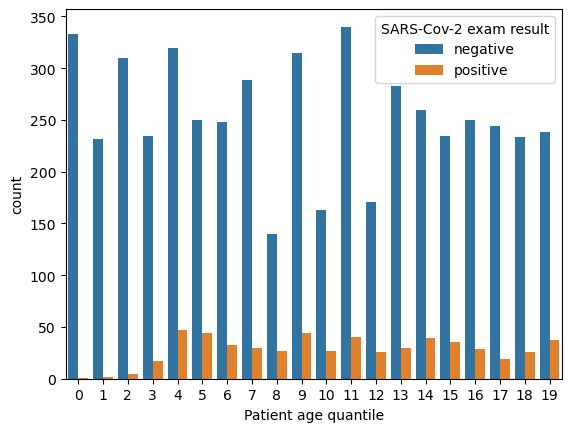

In [18]:
sns.countplot(x="Patient age quantile",data=data,hue="SARS-Cov-2 exam result")

### Relation Target / Viral


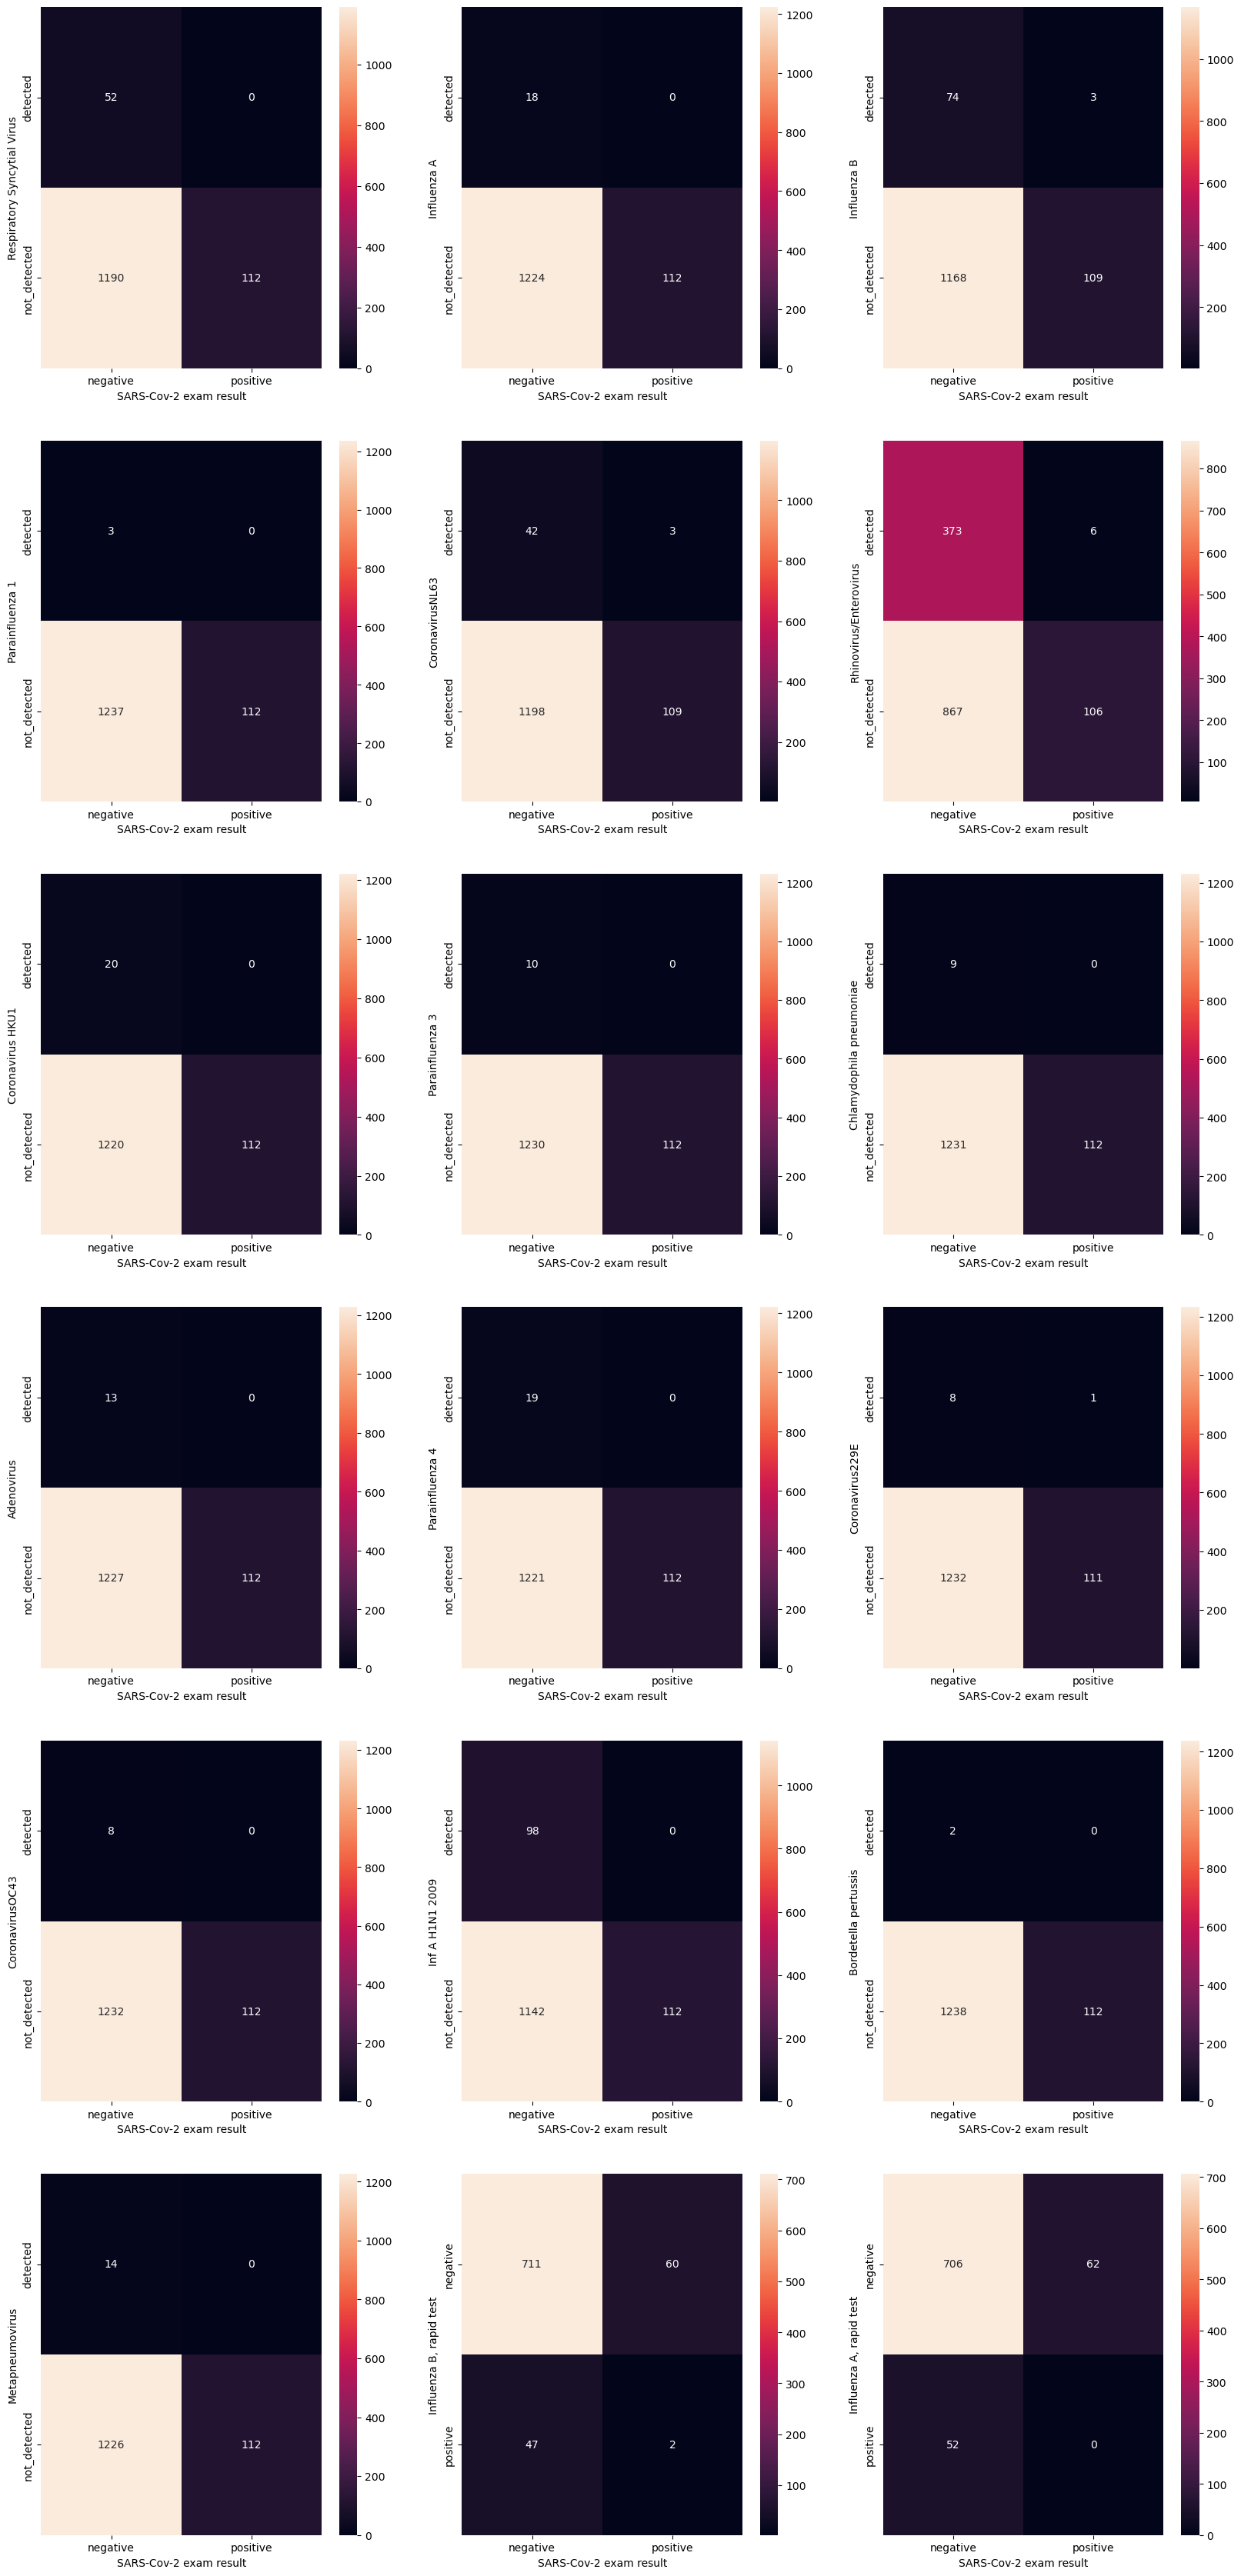

In [19]:
plt.figure(figsize=(20,50))
for i,col in enumerate(viral_columns.columns):
    plt.subplot(7,3,i+1)
    sns.heatmap(pd.crosstab(data[col],data["SARS-Cov-2 exam result"]),annot=True,fmt="d")


# Analyse Avancée

## Relation Variables/Variables

### Relation Taux Sanguin

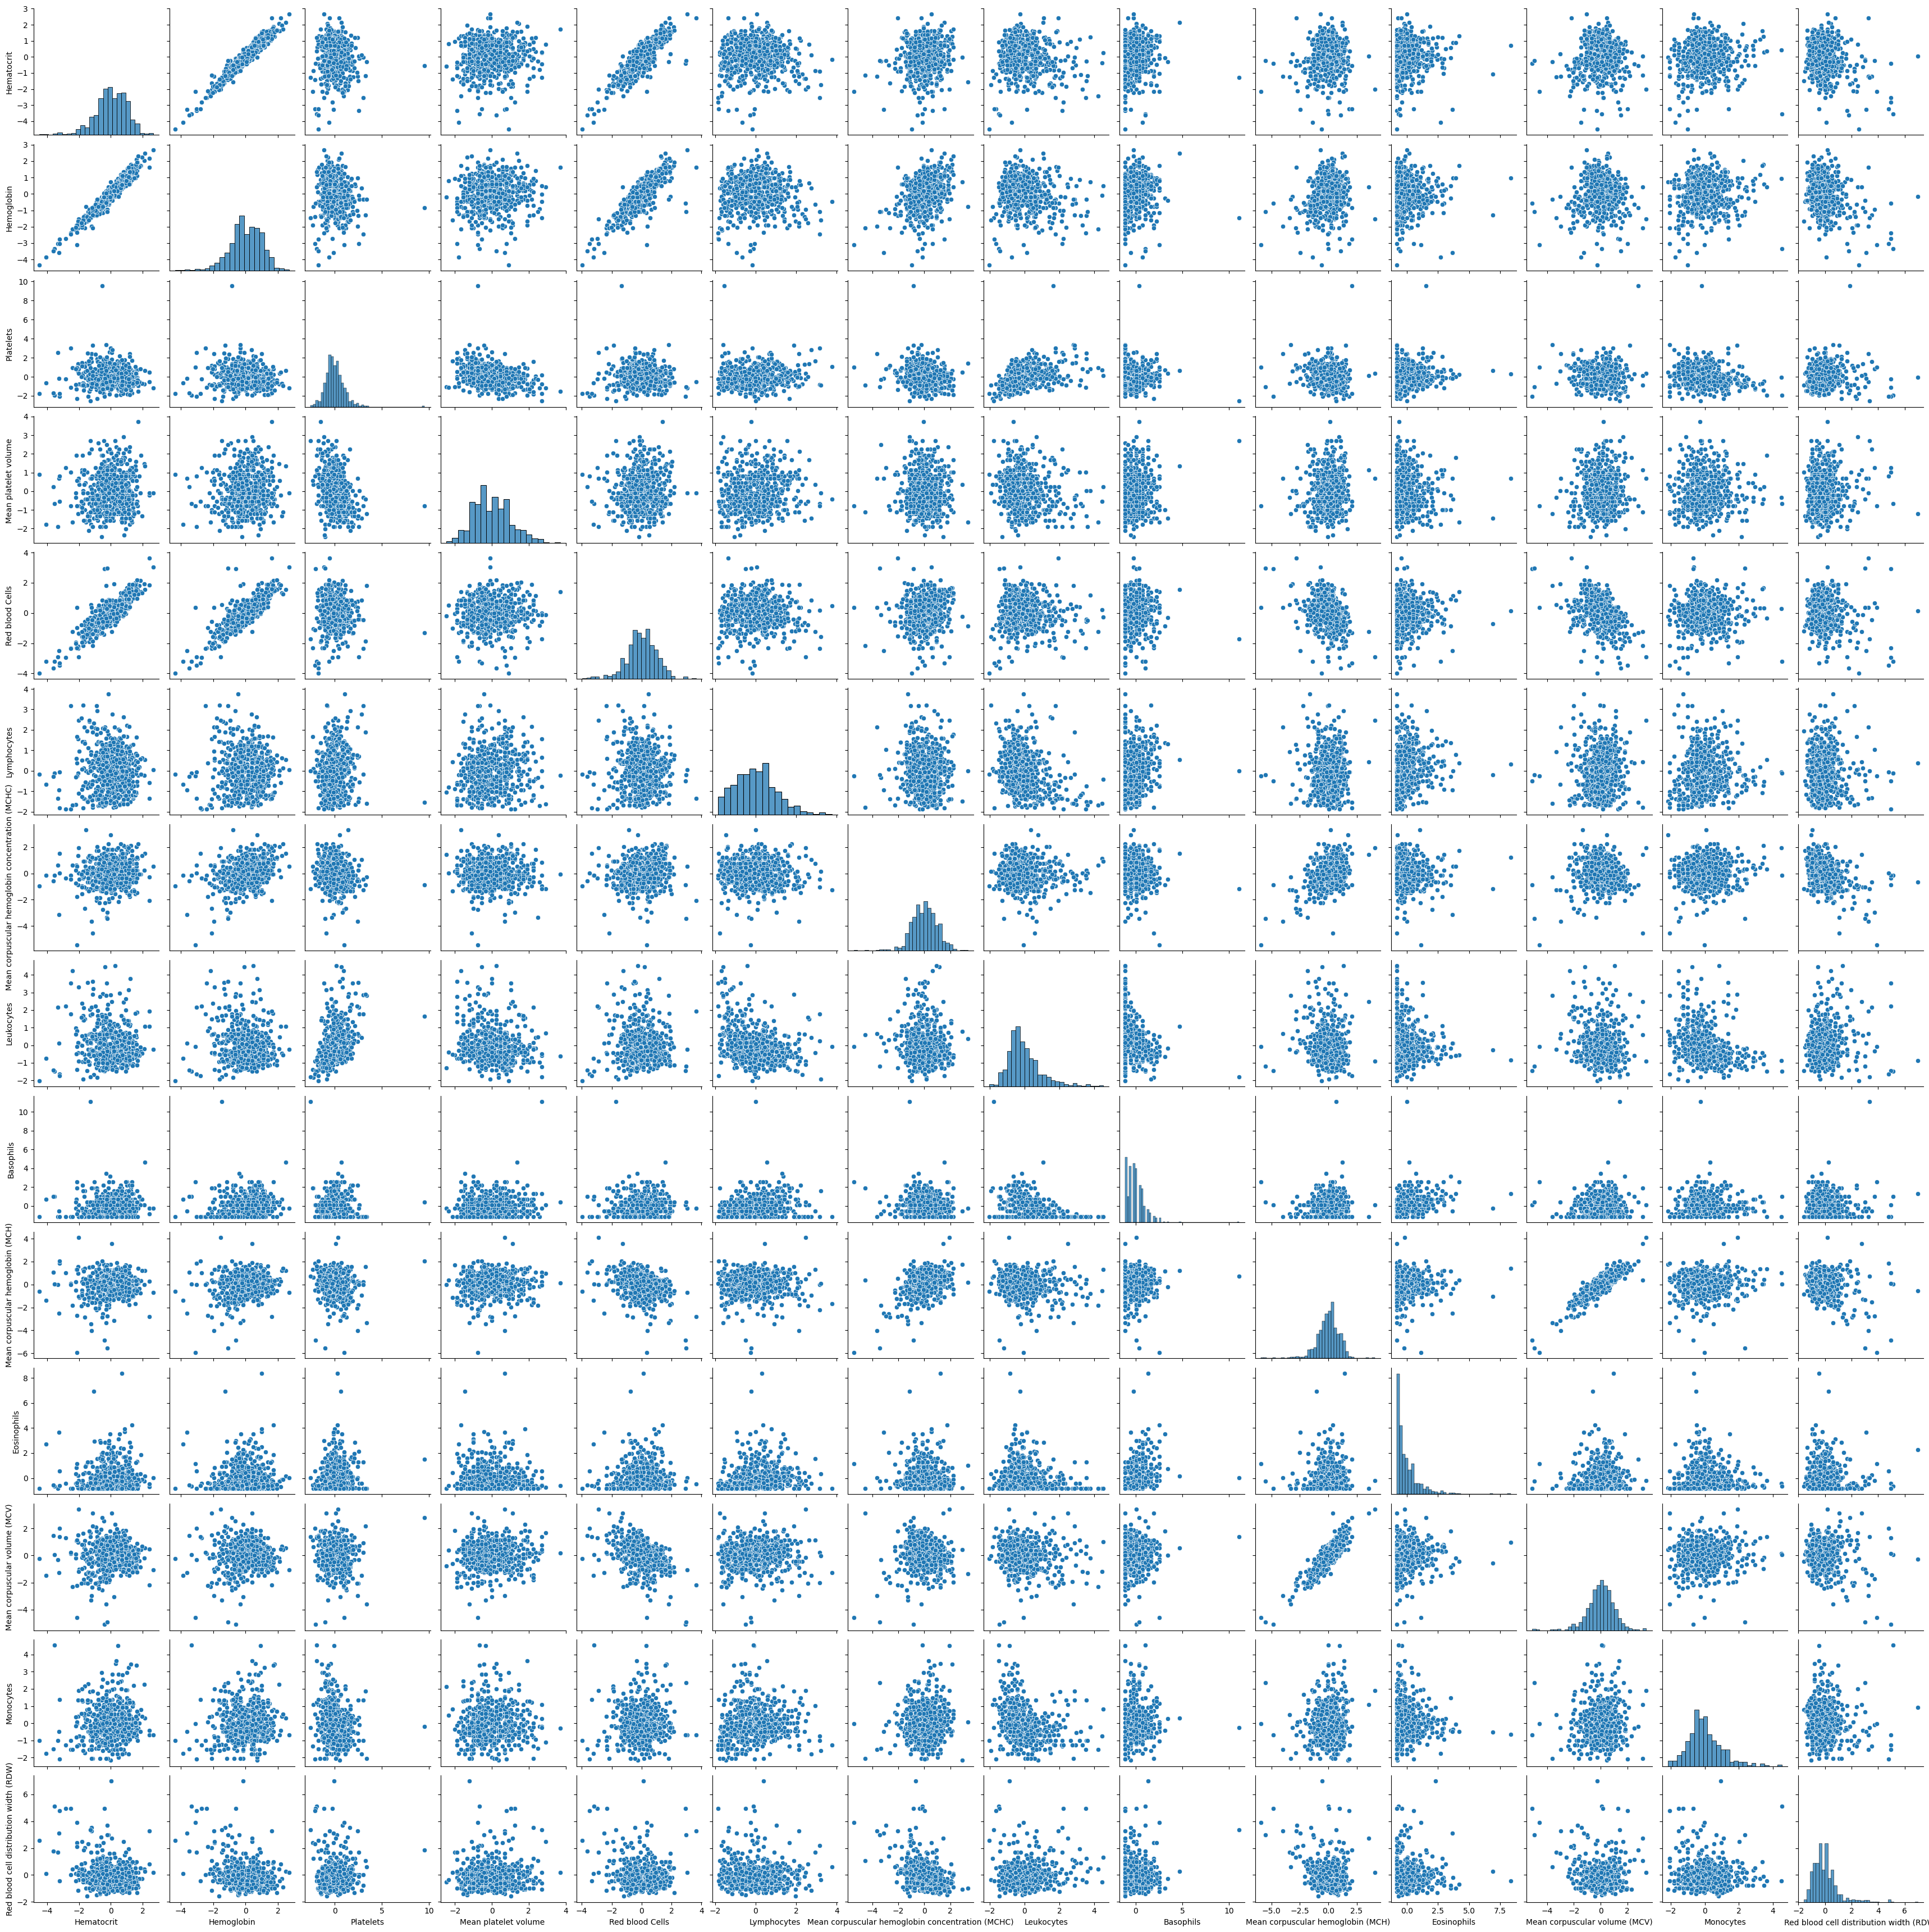

In [20]:
sns.pairplot(blood_columns)

<Axes: >

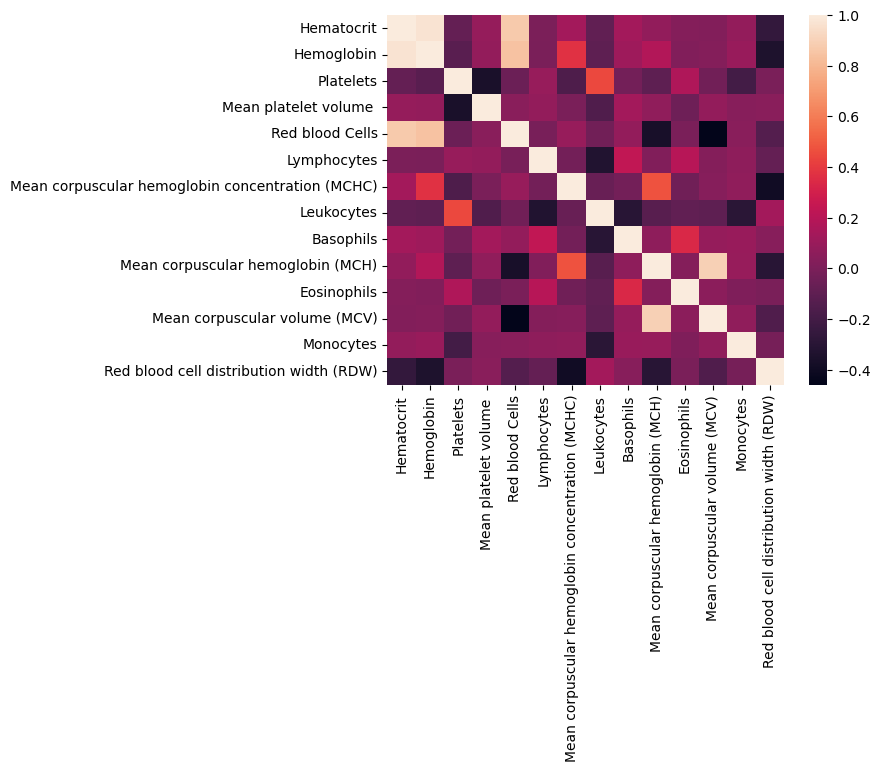

In [21]:
sns.heatmap(blood_columns.corr())

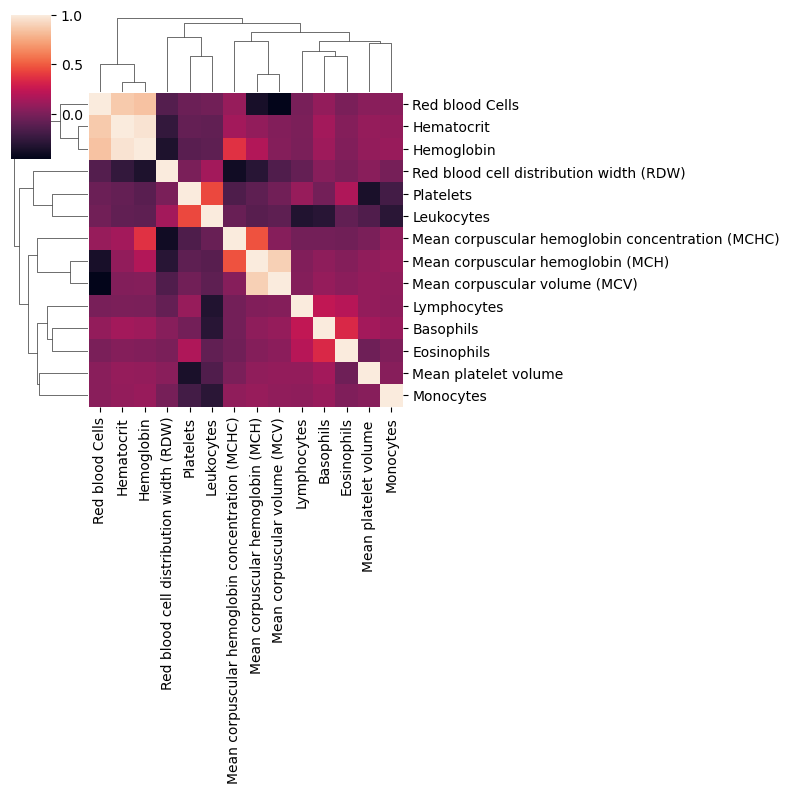

In [22]:
sns.clustermap(blood_columns.corr(),figsize=(8,8))

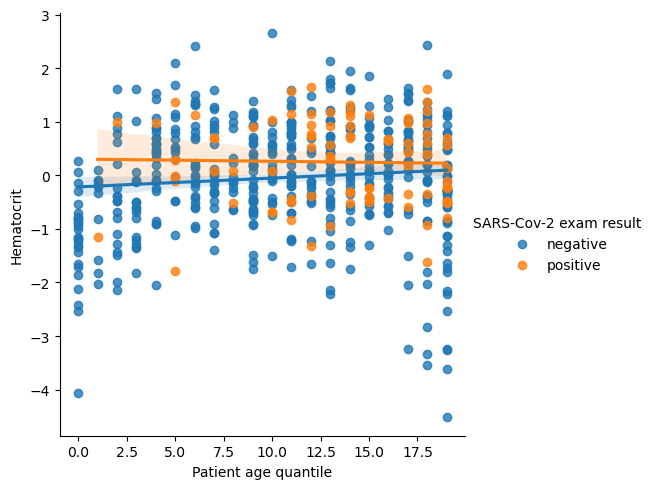

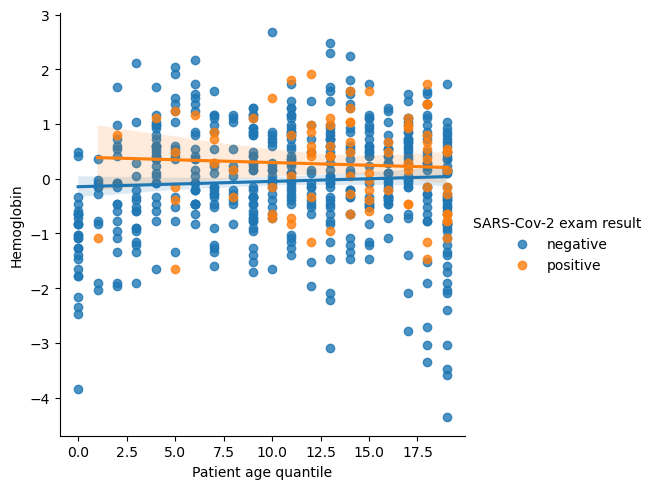

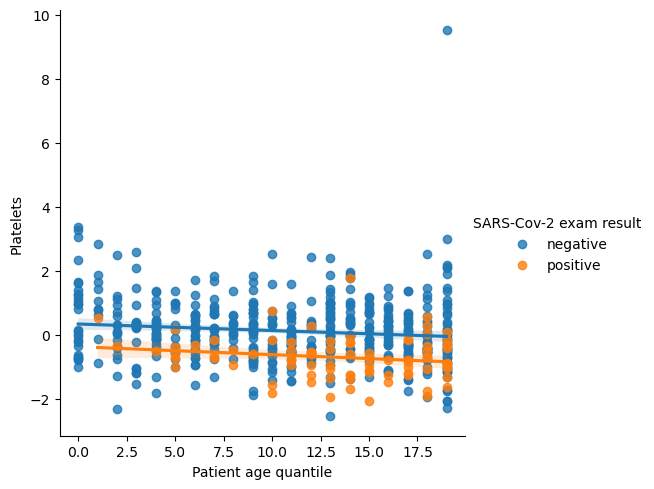

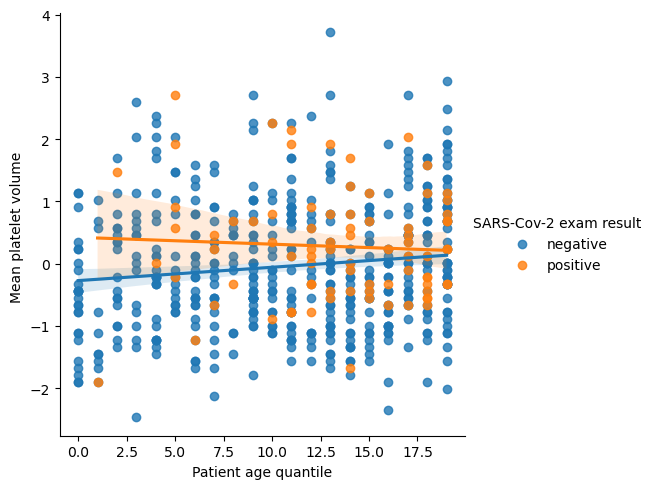

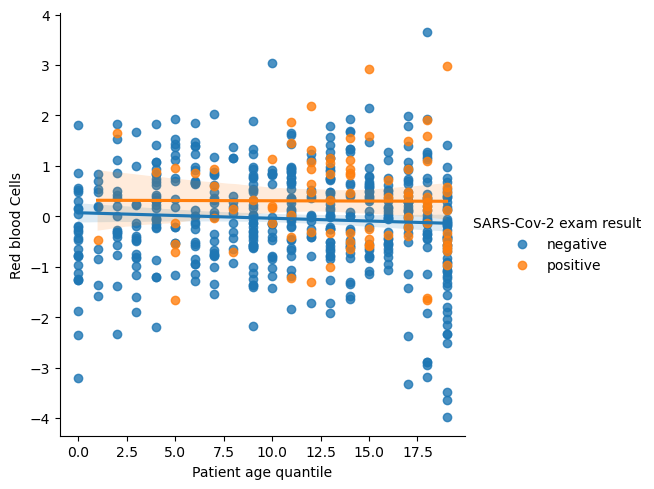

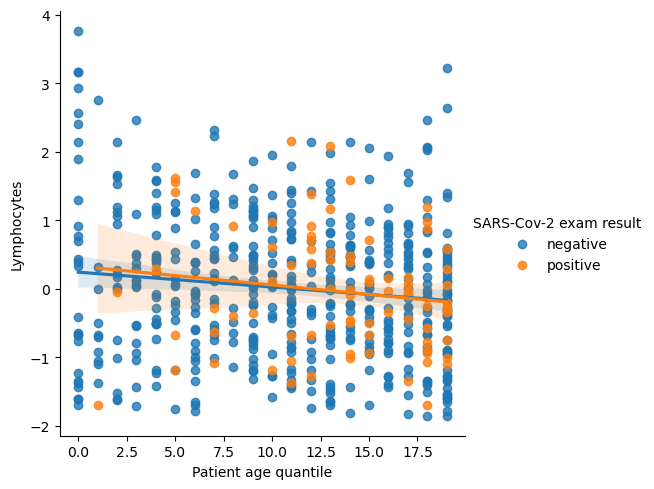

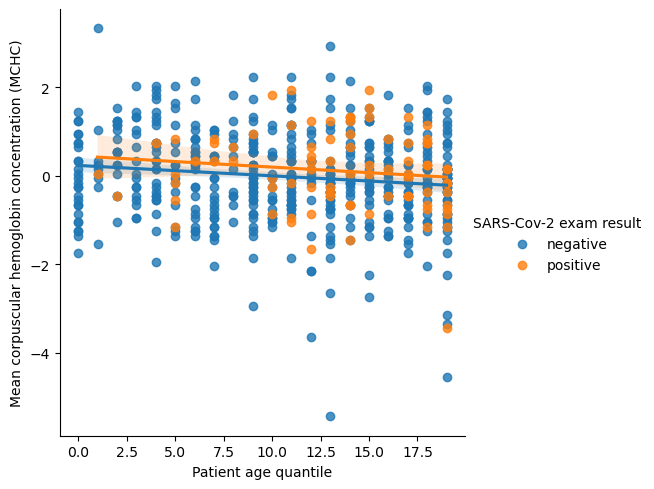

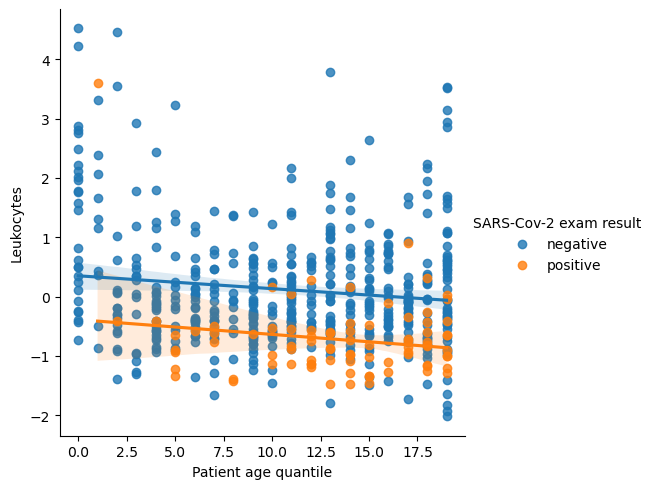

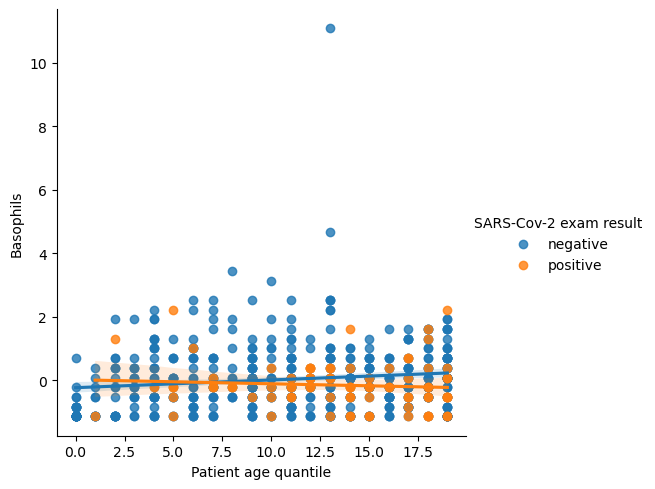

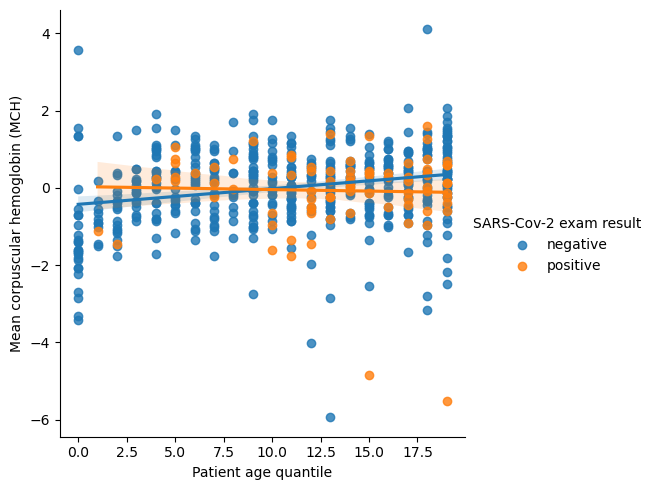

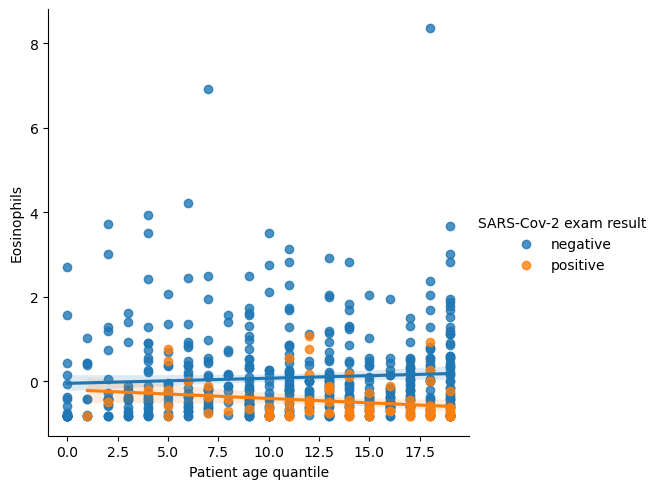

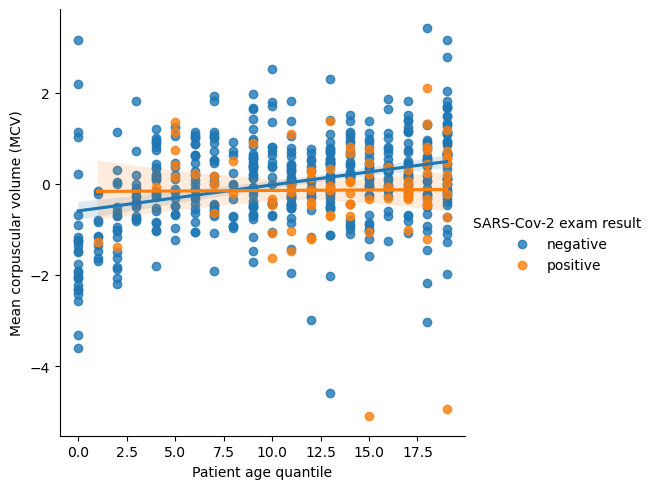

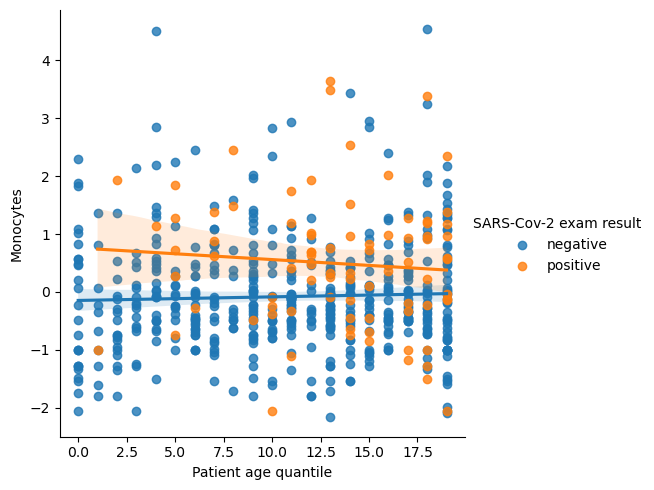

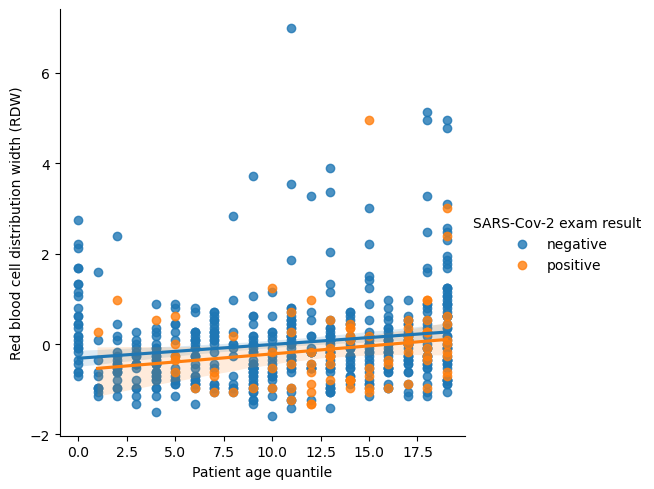

In [23]:

for i,col in enumerate(blood_columns.columns):

    sns.lmplot(y=col,x="Patient age quantile",data=data,hue="SARS-Cov-2 exam result",)

In [24]:
data.corr()["Patient age quantile"].sort_values(ascending=False)

Patient age quantile                                     1.000000
Mean corpuscular volume (MCV)                            0.281655
Mean corpuscular hemoglobin (MCH)                        0.197394
Red blood cell distribution width (RDW)                  0.166429
Mean platelet volume                                     0.119449
Basophils                                                0.107525
Hematocrit                                               0.096808
Hemoglobin                                               0.060320
Monocytes                                                0.050962
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Eosinophils                                              0.022085
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Red blood Cells                                         -0.037510
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Lymphocyte

In [25]:
pd.crosstab(data["Influenza A"],data["Influenza A, rapid test"])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [26]:
pd.crosstab(data["Influenza B"],data["Influenza B, rapid test"])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

Création d'une nouvelle variable "est malade"

In [27]:
data['est malade'] = np.sum(viral_columns[:-2] == 'detected', axis=1) >=1
data.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

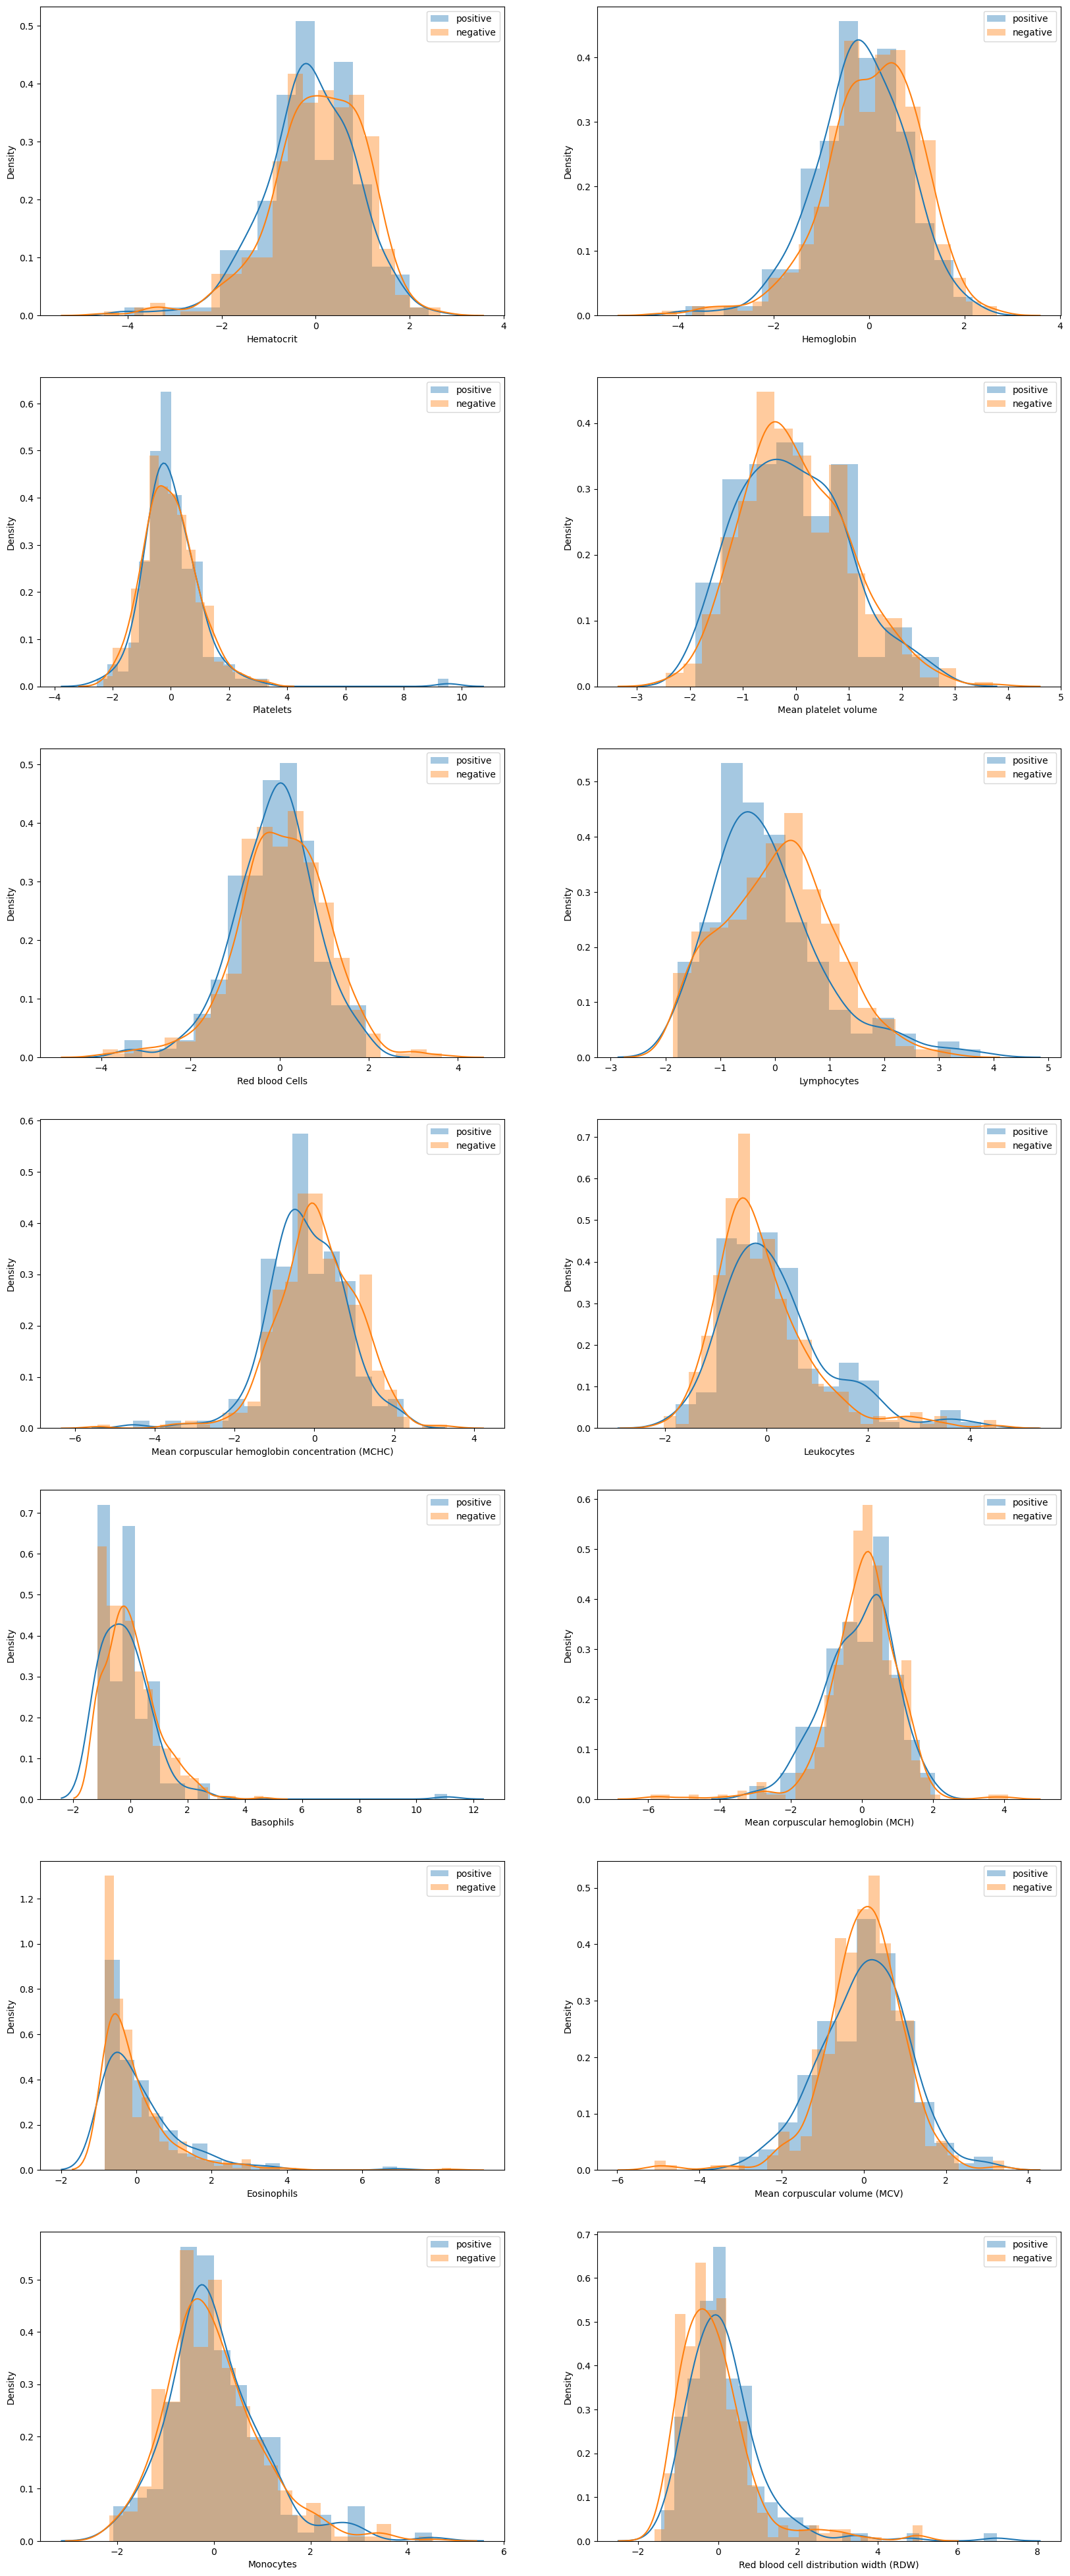

In [28]:
malade=data[data["est malade"]==True]
non_malade=data[data["est malade"]==False]
plt.figure(figsize=(20,50))
for i,col in enumerate(blood_columns.columns):
    plt.subplot(7,2,i+1)
    sns.distplot(malade[col],label="positive")
    sns.distplot(non_malade[col],label="negative")
    plt.legend()


In [29]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [30]:
data["statut"]=data.apply(hospitalisation,axis=1)

In [31]:
data[data["statut"]!="inconnu"]

Patient age quantile SARS-Cov-2 exam result  \
8                        1               negative   
30                       9               negative   
55                      19               negative   
69                      17               negative   
86                      19               negative   
...                    ...                    ...   
5553                    18               positive   
5557                     7               negative   
5564                    12               positive   
5566                    14               positive   
5581                    19               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
8                                                  0   
30                                                 1   
55                                                 0   
69                                                 1   
86                                                 0   
...                                              ...   
5553                                               1   
5557                                               1   
5564                                               1   
5566                                               1   
5581                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
8                                                     1       
30                                                    0       
55                                                    1       
69                                                    0       
86                                                    1       
...                                                 ...       
5553                                                  0       
5557                                                  0       
5564                                                  0       
5566                                                  0       
5581                                                  1       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
8                                                     0       -1.571682   
30                                                    0       -0.679027   
55                                                    0        0.625621   
69                                                    0             NaN   
86                                                    0       -0.518807   
...                                                 ...             ...   
5553                                                  0        0.602732   
5557                                                  0       -1.388574   
5564                                                  0        1.152058   
5566                                                  0        1.106281   
5581                                                  0       -2.212562   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
8      -0.774212   1.429667              -1.672222        -0.850035   
30     -0.711556   0.952319              -0.886869        -0.321124   
55      0.353596  -0.127997               0.796029         0.190156   
69           NaN        NaN                    NaN              NaN   
86     -0.586244   0.952319               0.010677        -0.144821   
...          ...        ...                    ...              ...   
5553    0.353596  -1.082694               1.581381         0.119635   
5557   -1.588740   1.668342              -2.120995        -1.008708   
5564    0.604220  -0.529975               0.010677         0.930631   
5566    1.042812  -0.253615              -0.438097         0.930631   
5581   -2.027332   0.826701              -0.325903        -2.031269   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
8       -0.005738                                          3.331071   
30      -0.875701                          

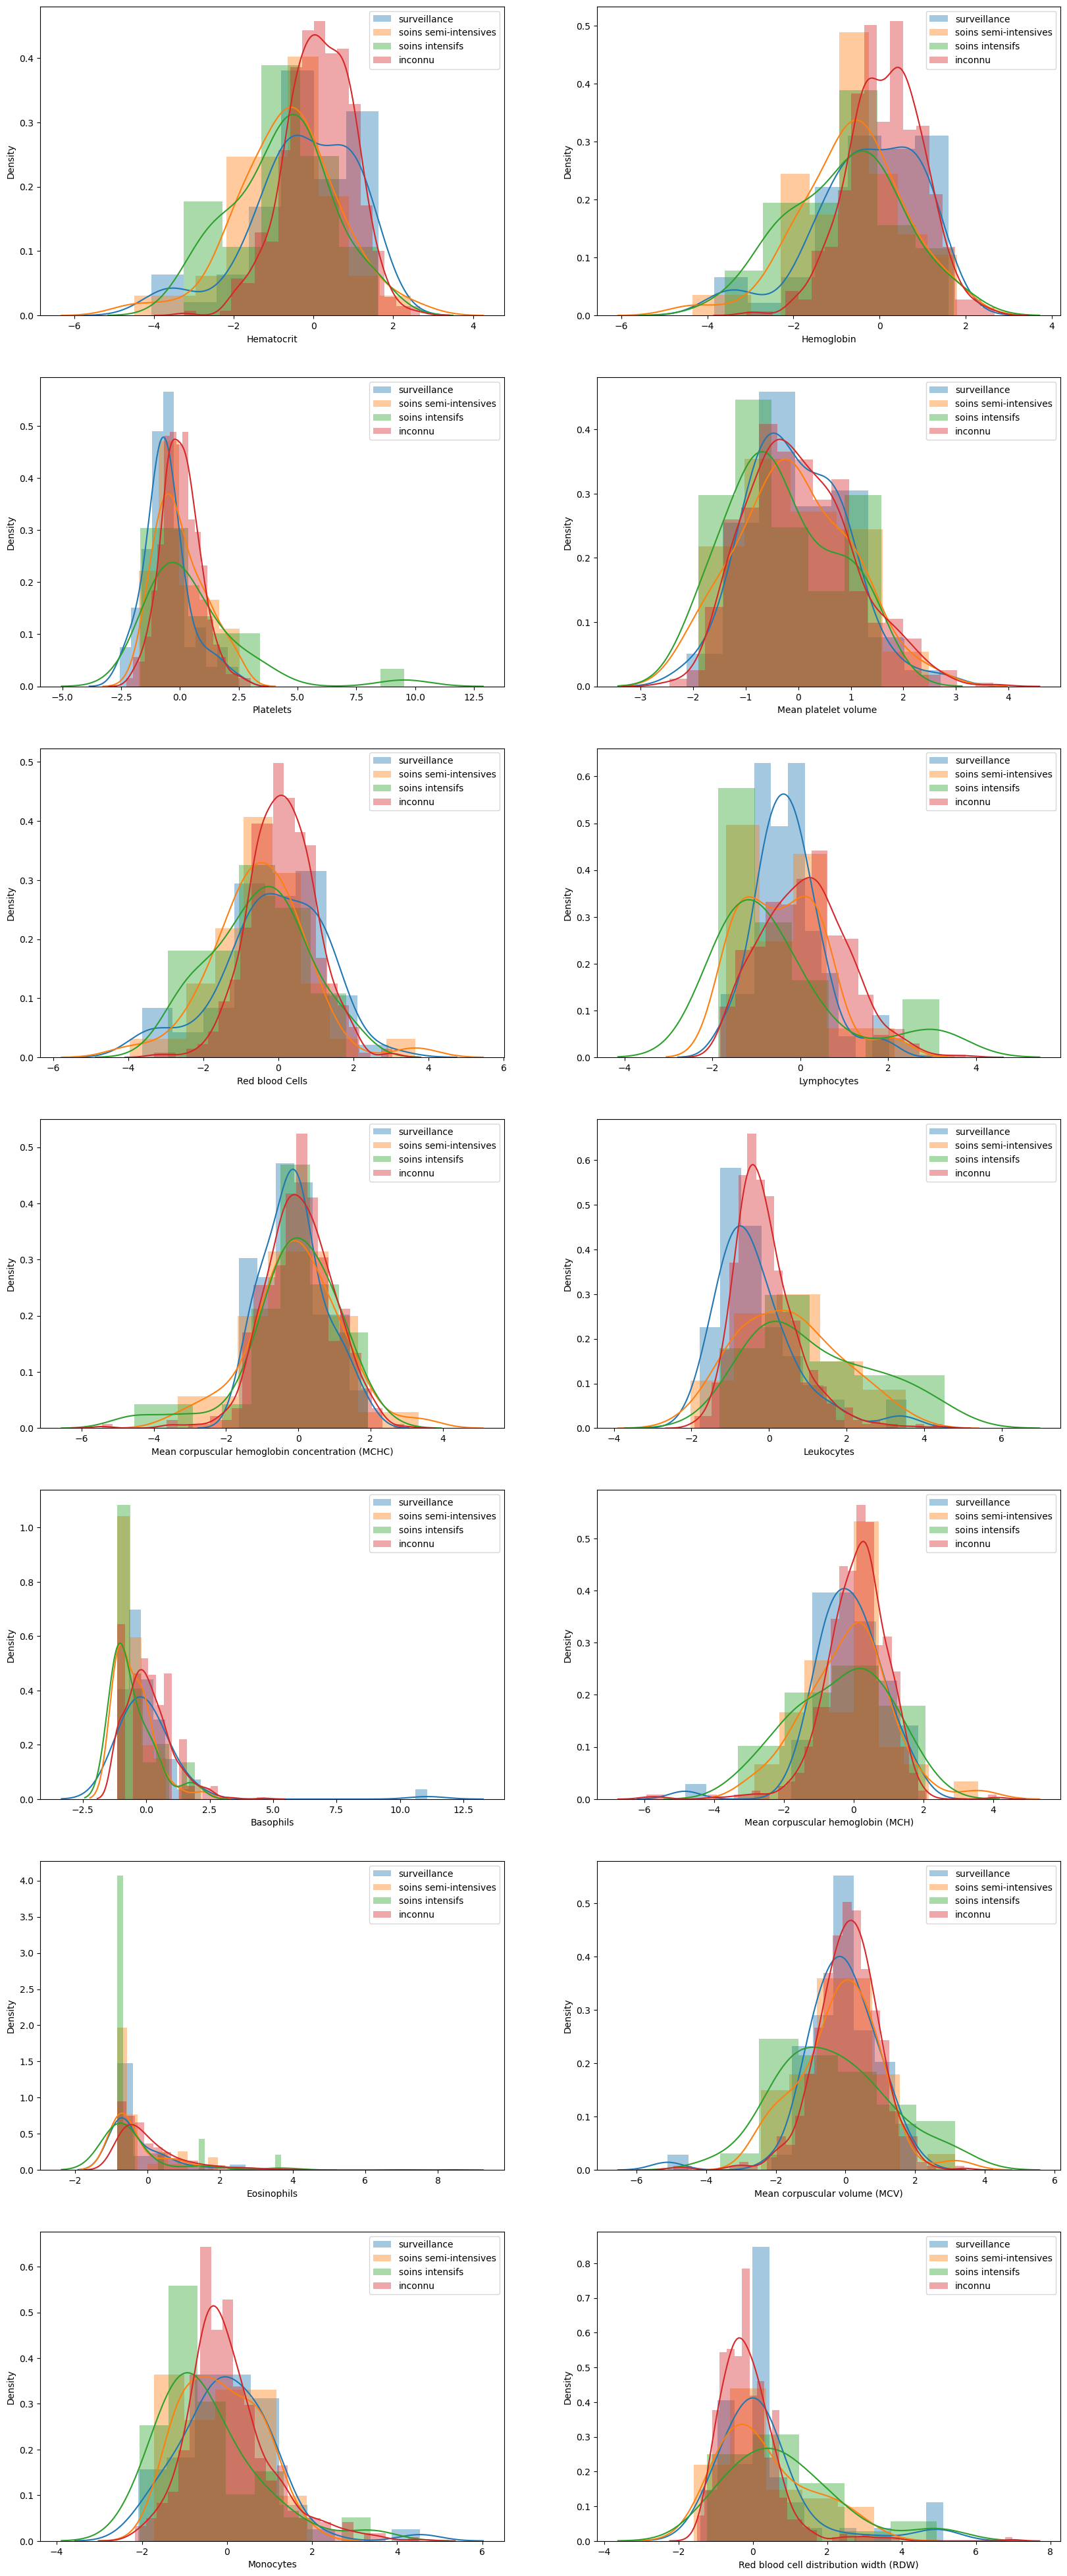

In [32]:
plt.figure(figsize=(20,50))
for i,col in enumerate(blood_columns.columns):
    plt.subplot(7,2,i+1)
    sns.distplot(data[data["statut"]=="surveillance"][col],label="surveillance")
    sns.distplot(data[data["statut"]=="soins semi-intensives"][col],label="soins semi-intensives")
    sns.distplot(data[data["statut"]=="soins intensifs"][col],label="soins intensifs")
    sns.distplot(data[data["statut"]=="inconnu"][col],label="inconnu")
    plt.legend()


In [33]:
data.dropna().count()
blood_columns.count()
viral_columns.count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [34]:
df1=viral_columns[:-2]
df2=blood_columns
df1["covid"]=data["SARS-Cov-2 exam result"]
df2["covid"]=data["SARS-Cov-2 exam result"]
print(df1.dropna()["covid"].value_counts(normalize=True))
print(df2.dropna()["covid"].value_counts(normalize=True))

negative    0.928302
positive    0.071698
Name: covid, dtype: float64
negative    0.864548
positive    0.135452
Name: covid, dtype: float64


### Null hypothese

T-Test

In [35]:
from scipy.stats import ttest_ind
positive.shape

(558, 37)

In [36]:
negative.shape

(5086, 37)

In [37]:
balanced_neg=negative.sample(positive.shape[0])

In [38]:
def ttest(col):
    alpha=0.02

    t,p=ttest_ind(positive[col].dropna(),balanced_neg[col].dropna())
    if p<alpha:
        s="reject null hypothesis"
        return s
    else:
        return p



In [39]:
for col in blood_columns.columns[:-1]:
    print(col,"------------------",ttest(col))


Hematocrit ------------------ 0.6676668234179675
Hemoglobin ------------------ 0.678506587219776
Platelets ------------------ reject null hypothesis
Mean platelet volume  ------------------ 0.06950625053031687
Red blood Cells ------------------ 0.4035055315290387
Lymphocytes ------------------ 0.18352683481368334
Mean corpuscular hemoglobin concentration (MCHC) ------------------ 0.8178717604527974
Leukocytes ------------------ reject null hypothesis
Basophils ------------------ 0.0233427924521062
Mean corpuscular hemoglobin (MCH) ------------------ 0.6049199087317806
Eosinophils ------------------ reject null hypothesis
Mean corpuscular volume (MCV) ------------------ 0.5096781030346104
Monocytes ------------------ 0.03470127668404466
Red blood cell distribution width (RDW) ------------------ 0.5897472174421565


In [40]:
print(data["Urine - Leukocytes"])

KeyError: 'Urine - Leukocytes'